In [2]:
%cd ..

c:\Code\Armband


In [18]:
import numpy as np
import pandas as pd
import random
import os
import keras_tuner as kt
from scipy import signal
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers as layers
from tensorflow.keras.layers import GlobalMaxPooling2D, Activation, Dense, Conv1D, Conv2D, Dropout, Flatten, MaxPooling2D, BatchNormalization, GlobalMaxPooling1D
from tensorflow.keras import optimizers

%matplotlib inline
import matplotlib.pyplot as plt

from tensorflow.keras import regularizers



from sklearn.model_selection import StratifiedKFold, KFold
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
from utils.signal import DCFilter, normalize
from utils.visualize import showMe, showHistory, showAvg
from utils.augment import apply_augment

from utils.models.conv_classifier import get_conv_classifier
from utils.models.conv_classifier2 import get_conv_classifier2
from utils.models.dense_classifier import get_dense_classifier
from utils.models.regression.conv import get_model
from utils.data import load_set, pre_process_set, format2train, shuffle

from config.continous import settings
from utils.visualizer import Visualizer
from utils.SamplerGenerator import SamplerGenerator

from utils.sampler import Sampler
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [11]:
generator = SamplerGenerator(settings, batch_size=64, n_steps = 500)
vis = Visualizer()

In [19]:
model = get_model()

Model: "model_2"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input (InputLayer)             [(None, 8, 500)]     0           []                               
                                                                                                  
 reshape_2 (Reshape)            (None, 8, 500, 1)    0           ['input[0][0]']                  
                                                                                                  
 average_pooling2d_6 (AveragePo  (None, 8, 250, 1)   0           ['reshape_2[0][0]']              
 oling2D)                                                                                         
                                                                                                  
 conv2d_4 (Conv2D)              (None, 8, 250, 100)  10100       ['average_pooling2d_6[0][0]

In [23]:

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=1e-2,
    decay_steps=20,
    decay_rate=0.98
    )
    

opt = keras.optimizers.Adam(learning_rate=lr_schedule)
#opt = keras.optimizers.Adam()


model.compile(optimizer=opt,
          loss='mean_absolute_error',
          metrics=['accuracy']
         )

Epoch 1/10
500/500 [==============================] - 6s 10ms/step - loss: 1.1502 - dense_7_loss: 0.3856 - dense_8_loss: 0.5426 - dense_7_accuracy: 0.0017 - dense_8_accuracy: 0.0022
Epoch 2/10
500/500 [==============================] - 5s 10ms/step - loss: 0.7622 - dense_7_loss: 0.3784 - dense_8_loss: 0.3785 - dense_7_accuracy: 8.5937e-04 - dense_8_accuracy: 7.8125e-04
Epoch 3/10
500/500 [==============================] - 5s 11ms/step - loss: 0.7520 - dense_7_loss: 0.3741 - dense_8_loss: 0.3745 - dense_7_accuracy: 0.0033 - dense_8_accuracy: 0.0025
Epoch 4/10
500/500 [==============================] - 6s 11ms/step - loss: 0.7449 - dense_7_loss: 0.3692 - dense_8_loss: 0.3704 - dense_7_accuracy: 0.0065 - dense_8_accuracy: 0.0048
Epoch 5/10
500/500 [==============================] - 5s 11ms/step - loss: 0.7437 - dense_7_loss: 0.3681 - dense_8_loss: 0.3696 - dense_7_accuracy: 0.0078 - dense_8_accuracy: 0.0058
Epoch 6/10
500/500 [==============================] - 5s 11ms/step - loss: 0.7394 

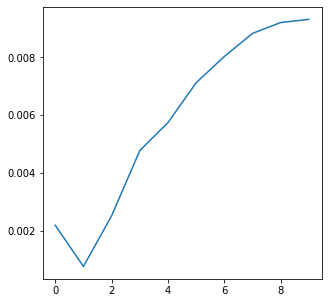

In [24]:
batch_size = 256
history = model.fit(generator,
                    #validation_data=(val_X, val_y),
                    batch_size=64,
                    epochs=100
                  )

showHistory(history)          